# Exploration of Contributors to College Rankings

# Names

- Angelo Avanzado
- Kotaro Murata
- Adam Schermerhorn
- Joel Villanueva
- Jason Xu



# Video

https://youtu.be/ZcDddrSQDDA (or https://drive.google.com/file/d/14ULRgPNNKqHlbmXTEjldQUi4H2GgdIUz/view?usp=sharing)

# Overview

This project observes how different factors affect a college's rank when compared to other schools. We analyzed the relationship between aspects like tuition and graduation rate and a college's rank and examined the amount of weight each variable has on weight. Our findings have shown that, though there are clear correlations between these factors and rank, graduation rate and the most positive influence on it. Our research was done specifically on universities within the United States.

<a id='research_question'></a>
## Research Question

How do the acceptance rate, average SAT score, socio-economic diversity, graduation rate, tuition and enrollment numbers of a college affect its ranking in a best colleges ranking from US News? 

## Background and Prior Work

College rankings are one of the first places students go to as a way of determining which college they want to go to after high school. It will most likely not be the sole determinant of which college you end up choosing to go to, but college rankings give a general idea of how competitive a school may be and gives an overall perspective on how prestigious a school is. There are many websites with similar but slightly different rankings for each college, but one source you would have come across at some point in your admission process is the U.S. News College Rankings, which give a comprehensive report on each college and is recognized throughout the U.S. as one of the best college rankings. But, what attributes of a college are considered when ranking one college over another?

U.S. News claims to use “a formula that uses statistical measures of academic quality, such as graduation rates, social mobility, graduate indebtedness, faculty information and admissions data,” [1] to develop their national universities rankings. However, their ranking model has become more favored to consider how students fare after graduating from their respective colleges as a factor in a school’s ranking as of late [2]. In comparison, Niche, a different review and ranking website, weighs “acceptance rate, quality of professors, as well as student and alumni surveys,” heavier than other factors in their calculation methods for best colleges. Having gone through the whole college admission process, we as a group are interested in finding how different attributes of a college such as graduation rates, acceptance rates, tuition, etc, can affect a particular school’s ranking on U.S. News. It is important to note that while college rankings can be a useful tool in the college decision making process, they should not be the sole determinant of where a student should attend. There are many other factors such as location, campus culture, and academic programs that should be considered and the best college is one that fits an individuals unique needs and goals.

[1]: “Frequently Asked Questions: 2022 Best Colleges Rankings - US News.” U.S. News, https://www.usnews.com/education/best-colleges/articles/rankings-faq.

[2]: “The Best Colleges Methodology.” Niche, https://www.niche.com/about/methodology/best-colleges/.

## Hypothesis

We believe that the attribute that has the greatest impact on college rankings on USNews in 2022 is the graduation rate of a given college. We believe this will be the outcome because a higher graduation rate would mean a more successful student body, which we assume is due to a more competent college. Our null hypothesis, then, will be that there is no relationship between a college's rank and any of our other variables. 

# Datasets

## Dataset 1

- **Dataset Name:** 2022 USA Undergrad College Rankings
- **Link to the dataset:** https://www.kaggle.com/datasets/neelgajare/2022-usa-college-rankings-more
- **Number of observations:** 391

This dataset contains the information of each college in the 2022 US News College Ranking. For each college the dataset gives us the 2022 ranking, tuition, and enrollment numbers. 


## Dataset 2


- **Dataset Name:** College Scorecard
- **Link to the dataset:** https://collegescorecard.ed.gov/data/
- **Number of observations:** 6542

This dataset contains a wide range of statistics on every U.S. college in 2022. Variables in this dataset include graduation rates, SAT scores, student to faculty ratio, median student debt, etc.

We plan to use the US News dataset as our means of comparison at the end of our analysis after finding our predicted rankings from the information on the college scorecard. 

# Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import patsy
import matplotlib
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
usnews = pd.read_csv('colleges.csv')
colleges = pd.read_csv('MERGED2021_22_PP.csv')

/tmp/ipykernel_209/1460551506.py:2: DtypeWarning: Columns (9,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2403,2404,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530) have mixed types. Specify dtype option on import or set low_memory=False.
  colleges = pd.read_csv('MERGED2021_22_PP.csv')


# Data Cleaning

First, we needed to extract the variables we observed from our datasets into a pandas dataframe. We would then rename all the columns to be more legible.

In [3]:
#extract chosen variables from datframe 'colleges'

colleges_cleaned = colleges.loc[:, ['INSTNM', 'ADM_RATE', 'SAT_AVG', 'FTFTPCTPELL_POOLED_SUPP', 'C150_4_POOLED_SUPP']]


#rename dataframe 'colleges' columns to be more legible

colleges_cleaned.columns = ['College_Name', 'Acceptance_Rate', 'Average_SAT_Score', 'Socio_Economic_Diversity', 'Graduation_Rate']


colleges_cleaned.head()

,College_Name,Acceptance_Rate,Average_SAT_Score,Socio_Economic_Diversity,Graduation_Rate
0,Alabama A & M University,0.7160,954.0,0.68,0.2833
1,University of Alabama at Birmingham,0.8854,1266.0,0.347,0.6181
2,Amridge University,NaN,NaN,PrivacySuppressed,PrivacySuppressed
3,University of Alabama in Huntsville,0.7367,1300.0,0.2368,0.5925
4,Alabama State University,0.9799,955.0,0.7477,0.3015


In [4]:
#rename 'usnews' dataframe columns to be more legible

usnews.columns = ['Rank', 'College_Name', 'Tuition', 'Enrollment_Numbers']

usnews.head()

,Rank,College_Name,Tuition,Enrollment_Numbers
0,0,Princeton University,56010,4773
1,1,Columbia University,63530,6170
2,2,Harvard University,55587,5222
3,3,Massachusetts Institute of Technology,55878,4361
4,4,Yale University,59950,4703


We would then merge our two dataframes into a single one for analysis and organize in ascending order according to rank.

In [5]:
#merge two dataframes into one master dataframes

test_merge = pd.merge(usnews, colleges_cleaned, on = 'College_Name')
master_df = test_merge

#sort dataframe in ascending order according to rank
master_df = master_df.sort_values(by = 'Rank', ascending = True)
master_df

,Rank,College_Name,Tuition,Enrollment_Numbers,Acceptance_Rate,Average_SAT_Score,Socio_Economic_Diversity,Graduation_Rate
0,0,Princeton University,56010,4773,0.0438,1517.0,0.2185,0.9779
1,2,Harvard University,55587,5222,0.0401,1534.0,0.1928,0.9719
2,3,Massachusetts Institute of Technology,55878,4361,0.0411,NaN,0.2016,0.959
3,4,Yale University,59950,4703,0.0531,1526.0,0.2022,0.9665
4,5,Stanford University,56169,6366,0.0395,1528.0,0.1924,0.9538
...,...,...,...,...,...,...,...,...
257,385,Wichita State University,18166,12406,0.9106,1132.0,0.3517,0.4807
258,386,William Carey University,14100,3264,0.5745,1217.0,0.3905,0.5686
259,387,William Woods University,25930,873,0.6830,NaN,0.3642,0.5368
260,388,Wilmington University,11750,9230,NaN,NaN,0.3485,0.2203


## Description of Variables

Rank: The rank of a college according to the 2022 US News College Ranking.

College Name: The name of the college.

Tuition: The out of state tuition for each college

Enrollment Numbers: The number of people attending undergrad at the college.

Acceptance Rate: The proportion of first-time students submitting an application to a particular school that were accepted for admission.

Average SAT Score: The average SAT score for first-time students enrolled at the school.

Socio-Economic Diversity: The percentage of full-time, first-time degree/certificate-seeking undergraduate students that receive a federal Pell Grant provides an indication of the level of socio-economic diversity at the school since Pell Grants are awarded based on income.

Graduation Rate: The graduation rate is the proportion of entering students that graduated at this school within 8 years of entry, regradless of their full-time/part-time status or prior postsecondary experience.

## Checking for Data Types

In [6]:
master_df.dtypes

Rank                          int64
College_Name                 object
Tuition                       int64
Enrollment_Numbers            int64
Acceptance_Rate             float64
Average_SAT_Score           float64
Socio_Economic_Diversity     object
Graduation_Rate              object
dtype: object

Since the data types differ between variables, we need to make sure they all have the same data type for easier analysis.

## Changing Variables to Numeric

In [8]:
master_df['Acceptance_Rate'] = pd.to_numeric(master_df['Acceptance_Rate'], errors='coerce')
master_df['Average_SAT_Score'] = pd.to_numeric(master_df['Average_SAT_Score'], errors='coerce')
master_df['Socio_Economic_Diversity'] = pd.to_numeric(master_df['Socio_Economic_Diversity'], errors='coerce')
master_df['Tuition'] = pd.to_numeric(master_df['Tuition'], errors='coerce')
master_df['Graduation_Rate'] = pd.to_numeric(master_df['Graduation_Rate'], errors = 'coerce')
master_df['Enrollment_Numbers'] = pd.to_numeric(master_df['Enrollment_Numbers'], errors = 'coerce')

## Assessment of Missingness

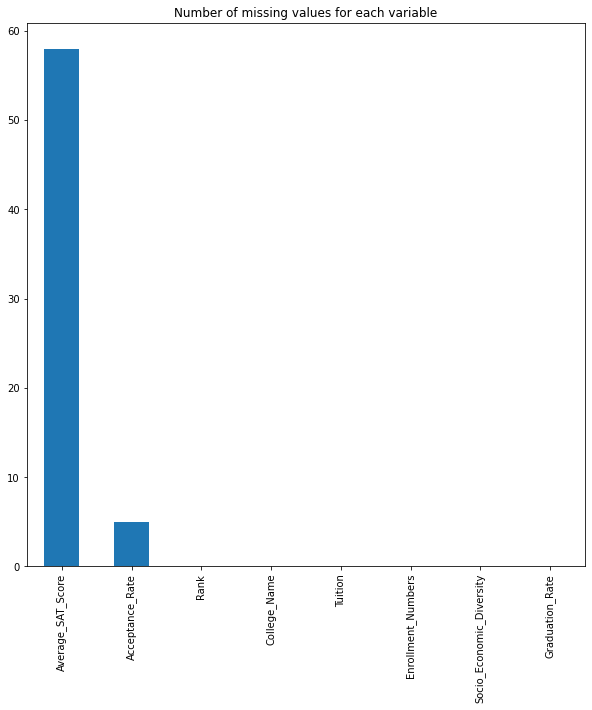

In [9]:
master_df.isnull().sum().sort_values(ascending = False).plot(kind = 'bar', figsize=(10, 10))
title = plt.title("Number of missing values for each variable", loc = 'center', pad = None)

Based on the graph above, we can see that most of the null values come from the Average SAT Score with a few from Acceptance Rate. To avoid any biases and distortion in the data, we will drop all colleges with missing values and recompile the dataset as shown below.

In [10]:
master_df = master_df.dropna(axis = 0);
master_df.reset_index()

,index,Rank,College_Name,Tuition,Enrollment_Numbers,Acceptance_Rate,Average_SAT_Score,Socio_Economic_Diversity,Graduation_Rate
0,0,0,Princeton University,56010,4773,0.0438,1517.0,0.2185,0.9779
1,1,2,Harvard University,55587,5222,0.0401,1534.0,0.1928,0.9719
2,3,4,Yale University,59950,4703,0.0531,1526.0,0.2022,0.9665
3,4,5,Stanford University,56169,6366,0.0395,1528.0,0.1924,0.9538
4,5,6,University of Chicago,60963,6989,0.0648,1535.0,0.1363,0.9594
...,...,...,...,...,...,...,...,...,...
199,252,379,University of Toledo,20818,14406,0.9652,1192.0,0.3273,0.5392
200,253,380,University of West Georgia,21432,10331,0.6970,1058.0,0.5208,0.4331
201,254,382,Valdosta State University,17638,9570,0.7637,1044.0,0.6037,0.4064
202,257,385,Wichita State University,18166,12406,0.9106,1132.0,0.3517,0.4807


In [47]:
master_df.head()

,Rank,College_Name,Tuition,Enrollment_Numbers,Acceptance_Rate,Average_SAT_Score,Socio_Economic_Diversity,Graduation_Rate,Log_Acceptance_Rate
0,0,Princeton University,56010,4773,0.0438,1517.0,0.2185,0.9779,-3.128121
1,2,Harvard University,55587,5222,0.0401,1534.0,0.1928,0.9719,-3.216379
3,4,Yale University,59950,4703,0.0531,1526.0,0.2022,0.9665,-2.935578
4,5,Stanford University,56169,6366,0.0395,1528.0,0.1924,0.9538,-3.231455
5,6,University of Chicago,60963,6989,0.0648,1535.0,0.1363,0.9594,-2.736450


# EDA: Exploratory Data Analysis

## Descriptive Statistics

In [11]:
summary_stats = master_df.describe()
print(summary_stats)

             Rank       Tuition  Enrollment_Numbers  Acceptance_Rate  \
count  204.000000    204.000000          204.000000       204.000000   
mean   186.088235  36449.593137        10851.019608         0.676260   
std    111.682176  14886.114474         9898.622763         0.261586   
min      0.000000     -1.000000          659.000000         0.039500   
25%     90.500000  24091.750000         3767.250000         0.568325   
50%    182.500000  34408.000000         7230.000000         0.765350   
75%    283.750000  49797.000000        14550.500000         0.873025   
max    386.000000  63000.000000        61456.000000         0.999900   

       Average_SAT_Score  Socio_Economic_Diversity  Graduation_Rate  
count         204.000000                204.000000       204.000000  
mean         1234.083333                  0.300758         0.676693  
std           147.254205                  0.137712         0.160173  
min           919.000000                  0.093800         0.210600  
2

## Data Visualization

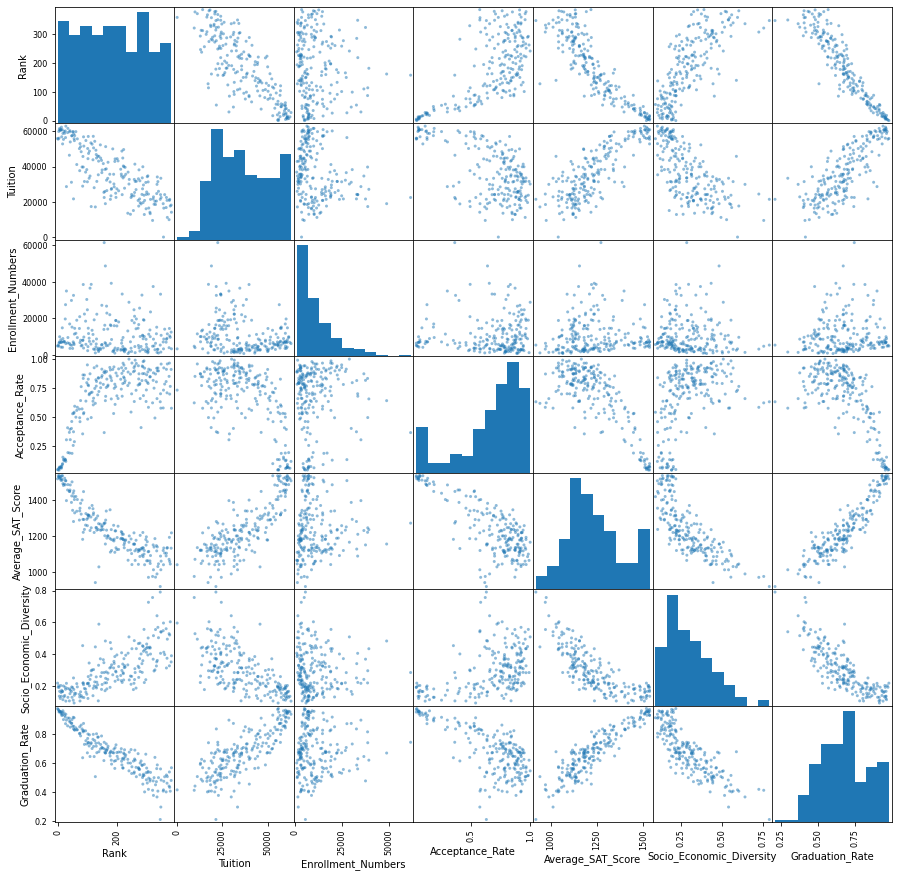

In [12]:
pd.plotting.scatter_matrix(frame = master_df, alpha = 0.5, figsize = (15, 15));

This scatter plot matrix offers us a look into the relationships that different variables hold with each other. As we can see, mnay of the variables hold somewhat of a linear relationship with each other. This graph provides us an initial set of potential linear relationships that we can explore in more depth later.

## Pearson's R Value 

Answering our research question relies on finding the relationships between our variables- specifically between the "rank" variable and the rest of the other characteristics of a college. One way we can see if a given characteristic influences rank is by finding their Pearson correlation coefficients. This "r" coefficient describes the direction and the strength of the relationship if there is one. 

#### Tuition R Value

In [13]:
r1, pval_1 = stats.pearsonr(master_df['Rank'],master_df['Tuition'])
print('r=', r1, 'p=', pval_1)

r= -0.8030595722864357 p= 2.677039945686278e-47


#### Enrollment Numbers R Value

In [14]:
r2, pval_2 = stats.pearsonr(master_df['Rank'],master_df['Enrollment_Numbers'])
print('r=', r2, 'p=', pval_2)

r= -0.08080275644515522 p= 0.2506045738276999


#### Acceptance Rate R Value

In [15]:
r3, pval_3 = stats.pearsonr(master_df['Rank'],master_df['Acceptance_Rate'])
print('r=', r3, 'p=', pval_3)

r= 0.6736830708179938 p= 2.4341167482834414e-28


#### Average SAT Scores R Value

In [16]:
r4, pval_4 = stats.pearsonr(master_df['Rank'],master_df['Average_SAT_Score'])
print('r=', r4, 'p=', pval_4)

r= -0.8718196095914101 p= 1.5713561630872374e-64


#### Socio-Economic Diversity R Value

In [17]:
r5, pval_5 = stats.pearsonr(master_df['Rank'],master_df['Socio_Economic_Diversity'])
print('r=', r5, 'p=', pval_5)

r= 0.7470973193372255 p= 1.1117415436844956e-37


#### Graduation Rate R Value

In [18]:
r6, pval_6 = stats.pearsonr(master_df['Rank'],master_df['Graduation_Rate'])
print('r=', r6, 'p=', pval_6)

r= -0.9281908332793627 p= 1.1351888970464272e-88


In [19]:
#combining all the r and p values in a single array

tuition_vals = ['Tuition',r1,pval_1]
enrollment_vals = ['Enrollment_Numbers',r2,pval_2]
accpetance_vals = ['Acceptance_Rate',r3,pval_3]
sat_vals = ['Average_SAT_Score',r4,pval_4]
soeco_vals = ['Socio_Economic_Diversity',r5,pval_5]
grad_vals = ['Graduation_Rate',r6,pval_6]

pd.DataFrame(np.array([tuition_vals, enrollment_vals,accpetance_vals, sat_vals,soeco_vals,grad_vals]), 
             columns = ['Variable_Type', 'R-Value', 'P-Value'])

,Variable_Type,R-Value,P-Value
0,Tuition,-0.8030595722864357,2.677039945686278e-47
1,Enrollment_Numbers,-0.08080275644515522,0.2506045738276999
2,Acceptance_Rate,0.6736830708179938,2.4341167482834414e-28
3,Average_SAT_Score,-0.8718196095914101,1.5713561630872374e-64
4,Socio_Economic_Diversity,0.7470973193372255,1.1117415436844956e-37
5,Graduation_Rate,-0.9281908332793627,1.1351888970464272e-88


From the table above, it's seen that tuition, enrollment numbers, SAT scores and graduation rate all have a negative relationship with rank. That is, as their numbers increase, the rank value of a given college decreases (this means an increase in the ranking). On the other hand, acceptance rate and socio-economiic diversity have positive relationships with rank, increasing and decreasing as rank does. 

# Distributions of Variables

## Tuition

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


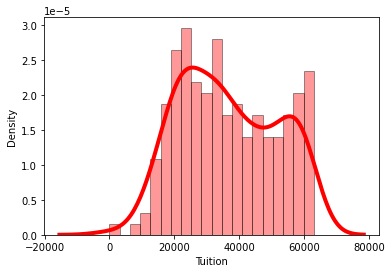

In [20]:
ax = sns.distplot(master_df['Tuition'], hist = True, kde = True, bins = int(len(master_df['Tuition'])/10), color = 'red', hist_kws={'edgecolor': 'black'}, kde_kws = {'linewidth':4})

## Enrollment Numbers

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


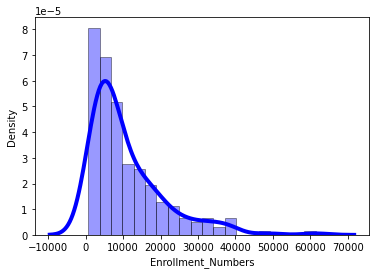

In [21]:
ax = sns.distplot(master_df['Enrollment_Numbers'], hist = True, kde = True, bins = int(len(master_df['Tuition'])/10), color = 'blue', hist_kws={'edgecolor': 'black'}, kde_kws = {'linewidth':4})

## Acceptance Rate

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


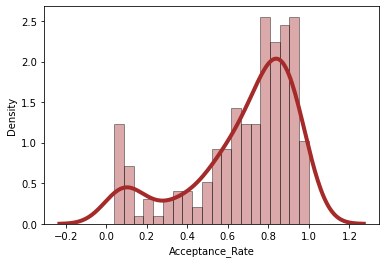

In [22]:
ax = sns.distplot(master_df['Acceptance_Rate'], hist = True, kde = True, bins = int(len(master_df['Acceptance_Rate'])/10), color = 'brown', hist_kws={'edgecolor': 'black'}, kde_kws = {'linewidth':4})

## Average SAT Score

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


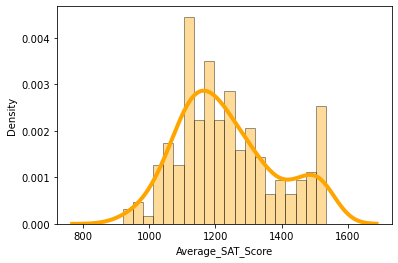

In [23]:
ax = sns.distplot(master_df['Average_SAT_Score'], hist = True, kde = True, bins = int(len(master_df['Average_SAT_Score'])/10), color = 'orange', hist_kws={'edgecolor': 'black'}, kde_kws = {'linewidth':4})

## Socio-Economic Diversity

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


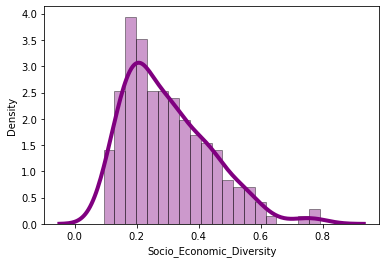

In [24]:
ax = sns.distplot(master_df['Socio_Economic_Diversity'], hist = True, kde = True, bins = int(len(master_df['Socio_Economic_Diversity'])/10), color = 'purple', hist_kws={'edgecolor': 'black'}, kde_kws = {'linewidth':4})

## Graduation Rate

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


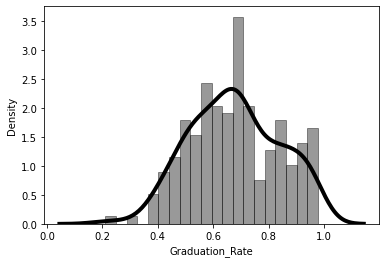

In [25]:
ax = sns.distplot(master_df['Graduation_Rate'], hist = True, kde = True, bins = int(len(master_df['Graduation_Rate'])/10), color = 'black', hist_kws={'edgecolor': 'black'}, kde_kws = {'linewidth':4})

# Linear Models

## Tuition

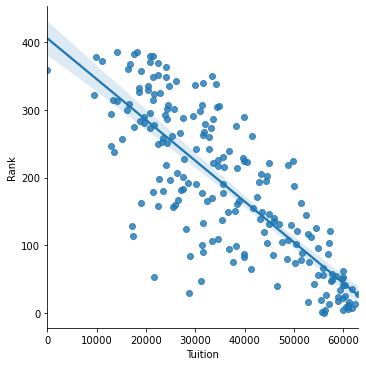

In [26]:
sns.lmplot(x = 'Tuition', y = 'Rank', data = master_df)

This linear model of Tuition vs Rank sees a relatively linear relationship between the two variables as we can see the fit line has a negative slope such that as rank approaches 1, tuition increases. A possible explanation to why a greater tuition may yield a higher rating may be that a greater tuition offers more resources for the institution to develop the quality of their programs, for example, which can then boost their rank.

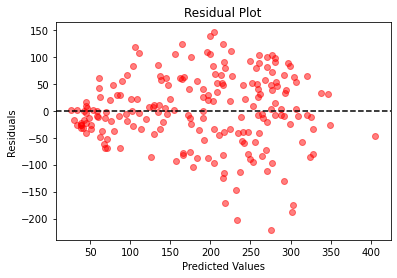

In [27]:
model = np.polyfit(master_df['Tuition'], master_df['Rank'], 1)
ax = plt.gca()
predicted_values = np.polyval(model, master_df['Tuition'])
residuals = master_df['Rank'] - predicted_values
ax.scatter(predicted_values, residuals, color='red', alpha=0.5)
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residual Plot')

plt.show()

This residual plot of Tuition vs Rank sees a wide spread of values about the line of best fit and this degree of variance is to be expected as there are several varying factors that determine tuition, such as whether the college or university is public or private as well as the area which the institution resides.

In [28]:
model = sm.OLS(master_df['Rank'], sm.add_constant(master_df['Tuition']))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     366.9
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           2.68e-47
Time:                        19:53:38   Log-Likelihood:                -1145.3
No. Observations:                 204   AIC:                             2295.
Df Residuals:                     202   BIC:                             2301.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        405.6936     12.380     32.769      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Based on the OLS regression results, we see that the coefficient for the tuition variable is -0.0060 which means that for every increase in tuition by one dollar, there is a 0.0060 decrease in the ranking of a college. Because this interpretation of the coefficient is hard to comprehend a better explanantion would be done by scaling the increase in tuition by a factor of 1000. Now we can say that for an increase of $1000 there is a 6 unit decrease in the rank of a college. Based on the constant, our model would predict that for a college with free tuition. The rank of the college would be set at 405. However, because our dataset only includes 204 colleges, this is an unrealistic constant and does not take into the fact that colleges are not free. Based on the given R-squared value of 0.645 there is a good correlation between rank and tuition. Lastly, due to the t-value not being within the confidence interval, we can say that the Tuition variable is statistically significant, showing that it has a meaninful impact on the ranking of the college. 

## Enrollment Numbers

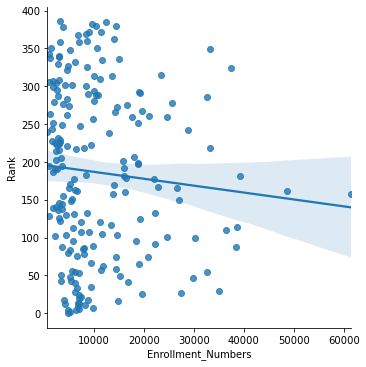

In [29]:
sns.lmplot(x = 'Enrollment_Numbers', y = 'Rank', data = master_df)

This linear model of Enrollment Numbers vs Rank shows little semblence of a linear relationship as all of the points are evenly spread out among rank regardless of the enrollment number. This absence of a linear relationship may be explained by the variations in college sizes and student capacity limits and thus the enrollment number would offer little direct explaination to the rank of any given college.

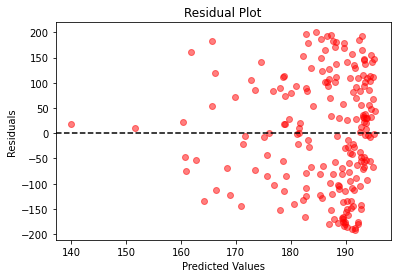

In [30]:
model = np.polyfit(master_df['Enrollment_Numbers'], master_df['Rank'], 1)
ax = plt.gca()
predicted_values = np.polyval(model, master_df['Enrollment_Numbers'])
residuals = master_df['Rank'] - predicted_values
ax.scatter(predicted_values, residuals, color='red', alpha=0.5)
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residual Plot')

plt.show()

The residual plot of Enrollment Numbers vs Rank further supports the lack of a linear relationship as the points have very little grouping about the line of best fit. 

In [31]:
model = sm.OLS(master_df['Rank'], sm.add_constant(master_df['Enrollment_Numbers']))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.328
Date:                Mon, 12 Jun 2023   Prob (F-statistic):              0.251
Time:                        19:53:38   Log-Likelihood:                -1250.3
No. Observations:                 204   AIC:                             2505.
Df Residuals:                     202   BIC:                             2511.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                195.9807     11

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Looking at the OLS regression results for enrollment numbers, we see that the coefficient is -0.0009. This implies that an increase of one student per college, there is a 0.0009 decrease in the ranking. As we can see from the linear model plot above, there is barely any correlation between the rankings and the enrollment numbers of a college. This is further proven by the very low R-squared value of 0.007, as well as the high p-value of 0.251. This shows that enrollment numbers is statistically insignificant with the ranking. This makes sense because the number of students in a college does not necessarily imply how academically well that college performs. This variable mostly has to do with factors such as how big the college is or if the college is a private or public school.

## Acceptance Rate

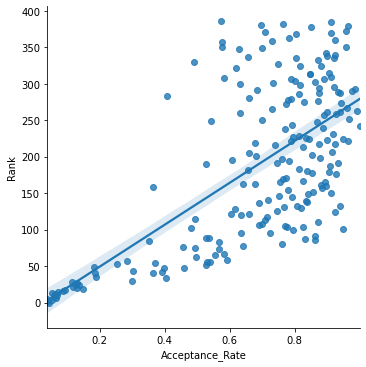

In [32]:
sns.lmplot(x = 'Acceptance_Rate', y = 'Rank', data = master_df)

This linear model plot of Acceptance Rate vs Rank shows a general linear relationship as the ranks get worse as the acceptance rate increases. 

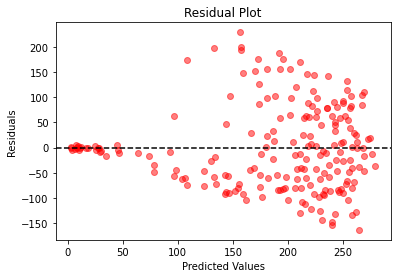

In [33]:
model = np.polyfit(master_df['Acceptance_Rate'], master_df['Rank'], 1)
ax = plt.gca()
predicted_values = np.polyval(model, master_df['Acceptance_Rate'])
residuals = master_df['Rank'] - predicted_values
ax.scatter(predicted_values, residuals, color='red', alpha=0.5)
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residual Plot')

plt.show()

For this residual plot between Acceptance Rates vs Rank, we can see a tight grouping of values about the line of best fit when acceptance rates are low and a significantly wider grouping as acceptance rates increase. This may be attributed to the general fact that higher ranked institutions are highly competitive and thus their acceptance rates would be lower as to filter out the high number of applicants. This significant increase in variance may point to acceptance rate being an unreliable indicator for rank in terms of a linear relationship.

In [34]:
model = sm.OLS(master_df['Rank'], sm.add_constant(master_df['Acceptance_Rate']))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     167.9
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           2.43e-28
Time:                        19:53:39   Log-Likelihood:                -1189.3
No. Observations:                 204   AIC:                             2383.
Df Residuals:                     202   BIC:                             2389.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.4207     16.092     

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Because there seems to be an exponential relationship between the acceptance rate and the rank of a college, we log transformed it and took the results as shown below.

#### Taking the Log of Acceptance Rate

In [35]:
master_df['Log_Acceptance_Rate'] = np.log(master_df['Acceptance_Rate'])
y = master_df['Rank']
X = master_df['Log_Acceptance_Rate']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     140.5
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           6.05e-25
Time:                        19:53:39   Log-Likelihood:                -1197.1
No. Observations:                 204   AIC:                             2398.
Df Residuals:                     202   BIC:                             2405.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 240.2959    

/tmp/ipykernel_209/995360632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df['Log_Acceptance_Rate'] = np.log(master_df['Acceptance_Rate'])
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Based on the log acceptance rate model above, we see that the coefficient is 96.9547. This implies that for a 1% increase in the acceptance rate, there is 0.96 increase in the rank of a college. We need to remember that an increase in rank means a worse college as rankings go up in value. The given R-squared value is 0.410 which shows that there is some correlation between the acceptance rate and the ranking. Based on the given t value of 11.852, it is not within the confidence interval which implies that acceptance rate is statistically significant and has some effect on the ranking.

## Average SAT Score

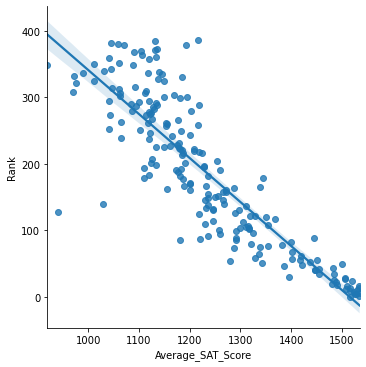

In [36]:
sns.lmplot(x = 'Average_SAT_Score', y = 'Rank', data = master_df)

This linear model plot of Average SAT Score vs Rank contains a significant linear relationship as we can see that as the average SAT score increases, the more the rank approaches 1. A possible reason for this may be that as the rank of a university increases, so does the competition for admission. Therefore, applicants would need a higher SAT score in order to be accepted and attend universities of a higher rank.

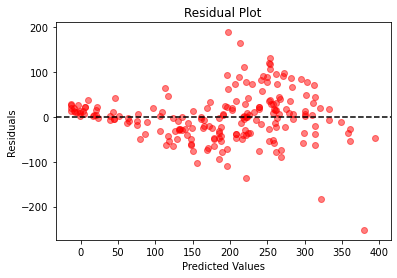

In [37]:
model = np.polyfit(master_df['Average_SAT_Score'], master_df['Rank'], 1)
ax = plt.gca()
predicted_values = np.polyval(model, master_df['Average_SAT_Score'])
residuals = master_df['Rank'] - predicted_values
ax.scatter(predicted_values, residuals, color='red', alpha=0.5)
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residual Plot')

plt.show()

The residual plot of Average SAT Score vs Rank shows a relatively tight grouping about the line of best fit which point to average SAT score being a solid indicator of an institutions given rank in terms of a linear relationship.

In [38]:
model = sm.OLS(master_df['Rank'], sm.add_constant(master_df['Average_SAT_Score']))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     639.9
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           1.57e-64
Time:                        19:53:39   Log-Likelihood:                -1105.4
No. Observations:                 204   AIC:                             2215.
Df Residuals:                     202   BIC:                             2221.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1002.0828     32.48

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


The table above details the relationship between average SAT scores and a college's rank based on an OLS regression model. From it, we see that the correlation  coefficient is -0.6612, meaning that every point increase in SAT score there is an observed 0.6612 decrease in rank. In the context of our research, this would mean a better college rank of 0.6612 per point increase in SAT score. The R-squared value is also fairly good at 0.76, meaning about 76 percent of the rank variable can be determined by SAT score.

## Socio-Economic Diversity

/tmp/ipykernel_209/3962542672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df['Socio_Economic_Diversity'] = pd.to_numeric(master_df['Socio_Economic_Diversity'], errors='coerce')


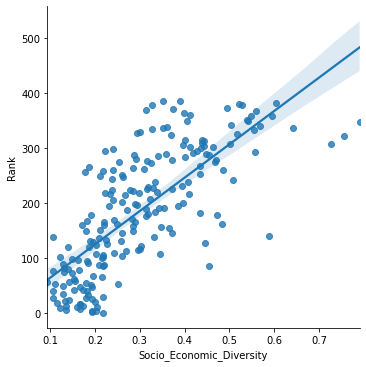

In [39]:
master_df['Socio_Economic_Diversity'] = pd.to_numeric(master_df['Socio_Economic_Diversity'], errors='coerce')
sns.lmplot(x = 'Socio_Economic_Diversity', y = 'Rank', data = master_df)

This linear model plot of Socio-economic Diversity vs Rank displays a somewhat linear relationship between the two variables as a increase in socio-economic diversity sees an increase(worse) rank.

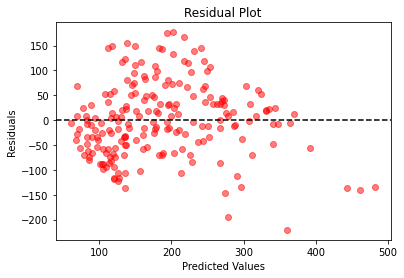

In [40]:
model = np.polyfit(master_df['Socio_Economic_Diversity'], master_df['Rank'], 1)
ax = plt.gca()
predicted_values = np.polyval(model, master_df['Socio_Economic_Diversity'])
residuals = master_df['Rank'] - predicted_values
ax.scatter(predicted_values, residuals, color='red', alpha=0.5)
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residual Plot')

plt.show()

The residual plot of Socio-economic Diversity vs Rank shows a relatively wide grouping of values about the line of best fit and we can also see multiple outliers within the data which may indicate socio-economnic diversity to be a potentially unreliable indicator for rank in terms of a linear relationship.

In [41]:
model = sm.OLS(master_df['Rank'], sm.add_constant(master_df['Socio_Economic_Diversity']))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     255.2
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           1.11e-37
Time:                        19:53:40   Log-Likelihood:                -1167.6
No. Observations:                 204   AIC:                             2339.
Df Residuals:                     202   BIC:                             2346.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Once again we fit an OLS regression model with rank and socio-economic diversity to show the relationship between two. Firstly, the r-squared value is 0.558, meaning only about half of the rank data can be predicted by the socio-economic diversity score. This signifies a less reliable correlation between the two variables. The correlation coefficient of 605.8847 indicates that one point increase in socio-economic diversity leads to a 605.8847 increase in rank. However, this coefficient is not fit for our data because the point intervals are a percentage. An equivalent coefficient would be about 60.59, meaning that for every 0.1 increase in socio-economic diversity there is an observed 60.59 increase in the rank variable. This is a more accurate representation of our data. 

## Graduation Rate

/tmp/ipykernel_209/794812135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df['Graduation_Rate'] = pd.to_numeric(master_df['Graduation_Rate'], errors='coerce')


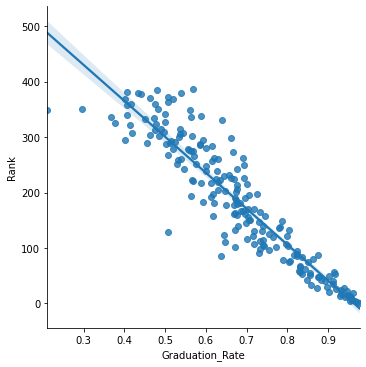

In [42]:
master_df['Graduation_Rate'] = pd.to_numeric(master_df['Graduation_Rate'], errors='coerce')
sns.lmplot(x = 'Graduation_Rate', y = 'Rank', data = master_df)

This linear model of Graduation Rate vs Rank sees a clear linear relationship between the two variables as a higher graduation rate corresponds to a lower(better) rank. This relation ship may be attributed to better ranked universities having higher quality resources which in turn lead to higher graduation rates. Therefore, graduation rate can be concluded to be confidently linearly related to rank. 

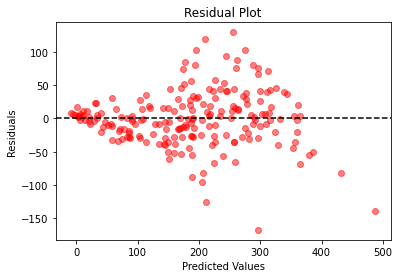

In [43]:
model = np.polyfit(master_df['Graduation_Rate'], master_df['Rank'], 1)
ax = plt.gca()
predicted_values = np.polyval(model, master_df['Graduation_Rate'])
residuals = master_df['Rank'] - predicted_values
ax.scatter(predicted_values, residuals, color='red', alpha=0.5)
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residual Plot')

plt.show()

The residual of Graduation Rate vs Rank sees a relatively close grouping of values about the line of best fit with slightly more variance toward the middle of the graduation rate values.

In [44]:
model = sm.OLS(master_df['Rank'], sm.add_constant(master_df['Graduation_Rate']))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1257.
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           1.14e-88
Time:                        19:53:40   Log-Likelihood:                -1049.3
No. Observations:                 204   AIC:                             2103.
Df Residuals:                     202   BIC:                             2109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             624.0380     12.693     

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


The OLS regression model results above illustrate the relationship between college rank and graduation rate. From the r-squared  value, we know that 86 perecent of the college rank can be explained by graduation rate. This is a much higher value compared to any of the other r-squared values, indicating a strong correlation between the two. The correlation coefficient -647.1915 how many ranks a college decreases per point increase in graduation rate. However, much like our model with socio-economic diversity, the graduation rate variable is a percentage. So, an equivalent correlation coefficient would be -64.719, meaning that for a 0.1 increase in the graduation rate variable there would be a -64.719 decrease in college rank. 

# Ethics and Privacy

### Ethics

In general, the nature of rankings itself can also lead to biased results if not made through use of objective numbers and formulas. We can circumvent using these types of biased rankings by observing datasets that explicitly detail their methodology alone. These methods would then need to be absent of any personal influences and, ideally, rely more on quantitative data.

One such question of ethics was brought to our attention upon observing that U.S. News specifically states that for its "reputation score", any data that is flagged by their collection system within a university’s submitted survey can be changed by the school itself and resubmitted for evaluation. This gives the surveyed colleges an opportunity to change how they appear on the ranking on their own accord, giving way for bias and the possibility of the introduction of data that does not accurately represent the institution in question. Thus, the variable of "reputation score" was removed from our observations to maintain our ethical and unbiased standing.

The findings from our data project do not contain any information that could be used in a harmful context. Our data analysis simply works to observe and measure the impact of a variety of variables in regards to public rankings. In addition, we also do not claim to encapsulate all aspects and factors of college rankings as we only observe a handful of select variables.

### Privacy
The data we observe in this project would be from publicly available datasets that would solely be used for our calculations and not for commercial use. These public datasets will also be anonymous, preventing us from violating the privacy of any one person who had taken a survey for data. Given that these surveys were anonymized, we do not have access to the original versions of them, so we would not be able to say with certainty that what was publicized on the datasets were identical to the originals. 

# Conclusion and Discussion

Our team originally set out to observe in detail how different factors affect a college's ranking amidst other colleges. We hypothesized that graduation rate would have an overall stronger relationship with college rank compared to other aspects such as tuition and average SAT score. After looking at the general distributions for our variables, we looked at each Pearson's r-value to get an initial estimate for what would affect ranking the most. We then conducted an analysis based on linear regression, specifically ordinary least squares regression, in order to more accurately deduce which can both predict ranking better and has a higher degree of influence on ranking. 

From our data, we see that graduation rate and average SAT scores have the highest accuracy when predicting rank, with r-squared values of 0.862 and 0.76 respectively. Enrollment numbers and acceptance rate were on the other end of the spectrum with both having r-squared values less than 0.5. In the interest of answering our research question, we continued to observe the OLS regression tables for graduation rate and average SAT scores, where we see that the former has both a higher r-squared and better correlation coefficient. Better in the sense that, when it comes to college rank, higher graduation rates yield a higher ranking placement than average SAT score. We choose to reject our null hypothesis and conclude that graduation rate has the greatest impact when it comes to college ranking in the U.S. 

In regards to limitation, our research was restricted to colleges specifically in the U.S. This means it would be inaccurate to extrapolate ranking predictions from our research and use it on international college rankings. We also only used two datasets for our analysis, though we were originally going to include three. However, because there were some colleges that didn't appear in all three datasets, we were unable to use the third dataset as it would lead to data inconsistencies. 

Our work on this project has confirmed, firstly, that there are a variety of factors that affect a college's ranking to varying degrees. It has also allowed us to see that of the variables we observed, graduation rate was the most impactful influence on a college's ranking. Through our analysis, we have shown a bit of insight into how much weight sources such as US News place on certain aspects of a university when comparing them to others.

# Team Contributions

- Angelo Avanzado: Worked on data visualization, including table for Pearson's r-values. Contributed to search for viable datasets. Worked on background and prior work section. Added descriptions for data visualizations. Worked on ethics and privacy section. 


- Kotaro Murata: Co-headed coordination of group. Contributed to search for viable datasets and finalized datasets to observe. Worked on background and prior work section. Worked on bulk of code, including data cleaning and data modeling with linear regression. Worked on log transformation of non-linear variables. Analyzed OLS regression models from data.


- Adam Schermerhorn: Added descriptions for visualizations. Filmed project video.


- Joel Villanueva: Co-headed coordination of group. Contributed to search for viable datasets and finalized datasets to observe. Worked on background and prior work section. Worked on bulk of code, including data cleaning and data modeling with linear regression. Worked on calculating Pearson's r-values. Analyzed OLS regression models from data.


- Jason Xu: Added descriptions for visualizations. Filmed project video.



